In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../datasets/houseprediction.csv')

In [3]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing

sy = preprocessing.MinMaxScaler()
sx = preprocessing.MinMaxScaler()

scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_x = sx.fit_transform(df[['area', 'bedrooms']])

In [5]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [6]:
def bath_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    
    total_sample = x.shape[0]
    cost_list = []
    epochs_list = []
    
    for i in range(epochs):
        
        y_predicted = np.dot(w, scaled_x.T) + b
        
        w_grad = -(2/total_sample)*(x.T.dot(y_true - y_predicted))
        b_grad = -(2/total_sample)*(np.sum(y_true - y_predicted))
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epochs_list.append(i)
            print(f"epoch: {i} cost:{cost}")
            
    return w, b, cost, cost_list, epochs_list

In [7]:
w, b, cost, cost, epochs = bath_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0], ), 500)

epoch: 0 cost:0.2768777174681
epoch: 10 cost:0.16573507027671064
epoch: 20 cost:0.10212908135956808
epoch: 30 cost:0.06564235879682481
epoch: 40 cost:0.04463022365578522
epoch: 50 cost:0.03245122421764872
epoch: 60 cost:0.025317339083010492
epoch: 70 cost:0.021067914076635823
epoch: 80 cost:0.01847041893523527
epoch: 90 cost:0.016821657535428185
epoch: 100 cost:0.015720331469182485
epoch: 110 cost:0.014937329116527901
epoch: 120 cost:0.014341749105819087
epoch: 130 cost:0.0138587099774241
epoch: 140 cost:0.013445288028074867
epoch: 150 cost:0.013076793952344979
epoch: 160 cost:0.012738945874049962
epoch: 170 cost:0.012423405193086517
epoch: 180 cost:0.012125230310262438
epoch: 190 cost:0.011841424159334757
epoch: 200 cost:0.011570105565415722
epoch: 210 cost:0.011310036391930275
epoch: 220 cost:0.01106035160957391
epoch: 230 cost:0.010820405104702651
epoch: 240 cost:0.010589681505198633
epoch: 250 cost:0.010367745666240432
epoch: 260 cost:0.010154213642862602
epoch: 270 cost:0.00994873

In [8]:
w, b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

In [9]:
from matplotlib import pyplot as plt

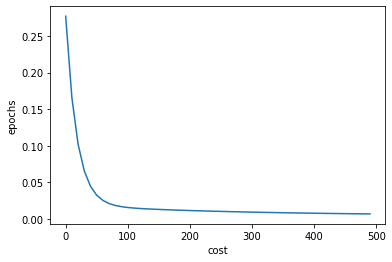

In [10]:
plt.xlabel('cost')
plt.ylabel('epochs')
plt.plot(epochs, cost)
plt.show()

In [11]:
def prediction(area, bedrooms, w, b):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    prediction = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return sy.inverse_transform([[prediction]])[0][0]

In [12]:
prediction(2600, 4, w, b)

128.45484403267596

In [13]:
import random

def stochastic_gradient_descent(x, y_true, epochos, learning_rate=0.01):
    number_of_features = x.shape[1]
    total_number_samples = x.shape[0]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    cost_list = []
    epochs_list = []
    
    for i in range(epochos):
        random_index = random.randint(0, total_number_samples-1)
        
        sample_y = y_true[random_index]
        sample_x = x[random_index]
        
        y_prediction = (np.dot(w, sample_x.T)) + b
        
        w_derivative = -(2/total_number_samples)*(sample_x.T.dot(sample_y - y_prediction))
        b_derivative = -(2/total_number_samples)*(sample_y - y_prediction)
        
        w = w - learning_rate*w_derivative
        b = b - learning_rate*b_derivative

        
        cost = np.square(sample_y - y_prediction)
        
        if i%10 == 0:
            cost_list.append(cost)
            epochs_list.append(i)
            
    return w, b, cost_list, epochs_list

In [14]:
w_SGD, b_SGD, cost_SGD, epochs_SGD = stochastic_gradient_descent(scaled_x, 
                                                                 scaled_y.reshape(scaled_y.shape[0], ), 10000)

In [15]:
w_SGD, b_SGD

(array([0.71034378, 0.67538617]), -0.23260621303505508)

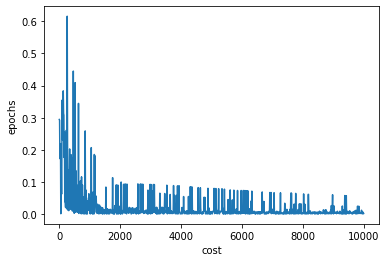

In [16]:
plt.xlabel('cost')
plt.ylabel('epochs')
plt.plot(epochs_SGD, cost_SGD)
plt.show()